#### Inicializaciones generales

In [4]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Definición de función plot_frequency_response para filtros digitales

In [6]:
def plot_frequency_response(tfz):
    # Calculate frequency response
    w, h = sig.freqz(tfz.num, tfz.den)

    # Normalize frequency axis
    freq_normalized = w / np.pi

    # Create a figure with vertical layout
    fig = plt.figure(figsize=(20, 24))

    # Plot Módulo
    ax1 = fig.add_subplot(311)
    ax1.plot(freq_normalized, 20 * np.log10(np.abs(h)))
    ax1.set_title('Respuesta de Módulo')
    ax1.set_ylabel('Módulo [dB]')
    ax1.grid()
    ax1.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax1.set_xlim(0, 1)

    # Plot Fase
    ax2 = fig.add_subplot(312)
    ax2.plot(freq_normalized, np.angle(h))
    ax2.set_title('Respuesta de Fase')
    ax2.set_ylabel('Fase [rad.]')
    ax2.grid()
    ax2.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax2.set_xlim(0, 1)

    # Plot group delay
    ax3 = fig.add_subplot(313)
    gd = -np.diff(np.unwrap(np.angle(h))) / np.diff(w)
    ax3.plot(freq_normalized[1:], gd)
    ax3.set_title('Retardo de Grupo')
    ax3.set_xlabel('Frecuencia normalizada')
    ax3.set_ylabel('Retardo de Grupo [muestras]')
    ax3.grid()
    ax3.annotate('', xy=(1, 0), xytext=(0, 0),
                  arrowprops=dict(facecolor='black', arrowstyle='->', linewidth=1))
    ax3.set_xlim(0, 1)
    
    # Find maximum delay and set plot limits
    max_delay_samples = np.ceil(np.max(gd))
    ax3.set_ylim(0, max_delay_samples)

    # Plot poles and zeros in a separate figure
    plt.figure(figsize=(8, 8))
    plt.plot(np.real(tfz.zeros), np.imag(tfz.zeros), 'o', color='blue', markersize=10, fillstyle='none', markeredgewidth=2, label='ceros')
    plt.plot(np.real(tfz.poles), np.imag(tfz.poles), 'x', color='red', markersize=10, markeredgewidth=2, label='polos')
    
    # Plot unit circle
    unit_circle = plt.Circle((0, 0), 1, color='gray', linestyle='--', fill=False)
    plt.gca().add_patch(unit_circle)
    
    plt.title('Polos y ceros')
    plt.xlabel('Real')
    plt.ylabel('Imaginario')
    plt.legend()
    plt.grid()
    
    # Add double-ended arrows from plot edges
    xlim = plt.xlim()
    ylim = plt.ylim()
    arrowprops = dict(facecolor='black', arrowstyle='<->', linewidth=1)
    plt.annotate('', xy=(xlim[0], 0), xytext=(xlim[1], 0), arrowprops=arrowprops)
    plt.annotate('', xy=(0, ylim[0]), xytext=(0, ylim[1]), arrowprops=arrowprops)

    plt.tight_layout()
    plt.show()

## Examen final - 27/09/2023

### Ejercicio 3

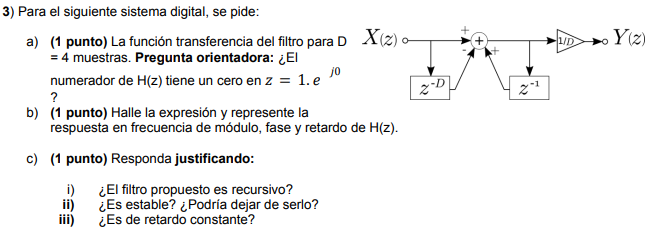

#### Resolución

##### a) Realizar la síntesis gráfica del filtro normalizado (resistencia de generador unitaria y pulsación angular central unitaria), para determinar la topología del filtro.

Para la resolución de este ejercicio, se plantea un sistema de 3 ecuaciones:

(1) $ Y(z) = \frac{1}{D} A(z) => A(z) = 4.Y(z) $ (4)

(2) $ D = 4 $

(3) $ A(z) = X(z) + A(z)z^{-1} - X(z) z^{-D} $


Reemplazando $(4)$ en $(3)$:

$ A(z) = 4 Y(z) = X(z) + A(z) . z^{-1} - X(z) . z^{-4} $

$ 4 . Y(z) = X(z) + 4 . Y(z) . z^{-1} - X(z) . z^{-4} $

$ X(z) - X(z) . z^{-4} = 4 . Y(z) - 4 . Y(z) . z^{-1} $

$ X(z) (1 - z^{-4}) = Y(z) (4 - 4 . z^{-1}) $

Entonces:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{1 - z^{-4}}{4 - 4 z^{-1}} $$




Sacamos factor comun 4 en el denominador:
$$ \frac{Y(z)}{X(z)} = H(z) = \frac{1 - z^{-4}}{4 - 4 z^{-1}} =  \frac{1}{4}  \frac{1 - z^{-4}}{1 - z^{-1}} $$

Planteamos en formato fraccion, para luego aplicar denominador común:
$$ H(z) = \frac{1}{4}  \frac{1 - \frac{1}{z^{4}}}{1 - \frac{1}{z}} = \frac{1}{4}  \frac{\frac{z^{4} - 1}{z^{4}}}{\frac{z - 1}{z}}$$

Simplificamos y luego abrimos mostrando sus polos y ceros
$$ H(z) = \frac{1}{4}  \frac{z^{4} - 1}{(z-1)z^{3}}  = \frac{1}{4}  \frac{(z+1)(z-1)(z+j)(z-j)}{(z-1)z^{3}} $$

Simplificando $(z-1)$ en numerador y denominador, nos queda:
$$ H(z) = \frac{1}{4}  \frac{(z+1)(z+j)(z-j)}{z^{3}} $$

Factorizando para poder obtener la $H(z)$ final, obtenemos:

$$ H(z) = \frac{1}{4} \frac{(z+1)(z^{2}+1)}{z^{3}} $$

$$ H(z) = \frac{z^{3}+z^{2}+z+1}{4z^{3}} $$


##### b) Halle la expresión y represente la respuesta en frecuencia de módulo, fase y retardo de $H(z)$

Nota: se define el numerador y denominador en python de la siguiente manera

num/den = np.array([$ s^{3}, s^{2}, s^{1}, s^{0} $])

In [1]:
bm =  np.array([1, 1, 1, 1])
an =  np.array([4, 0, 0, 0])

# planteamos una fs = 2 Hz, de modo tal que Nyqyuist = 1 Hz y tengamos el "ancho de banda" digital normalizado.
fs = 2
my_df = sig.TransferFunction(bm, an, dt=1/fs)
plot_frequency_response(my_df)

NameError: name 'np' is not defined

##### c) Responda justificando:
    i)      ¿El filtro propuesto es recursivo?

    ii)     ¿Es estable?¿Podría dejar de serlo?

    iii)    ¿Es de retardo constante?


Respuestas:

i) El filtro propuesto es un FIR recursivo, ya que la salida depende de la propia salida. Lo identificamos con la fórmula $(1)$ del desarrollo.

ii) El filtro es estable pues todos sus polos se encuentran en el origen. Para que deje de ser estable, debería tener singularidades fuera de la circunferencia de radio unitaria, por lo que si deberíamos forzar esta situación para que dejara de serlo.

iii) Dado que su fase es lineal por ser un FIR, su retardo debe ser constante. En el gráfico de retardo de grupo se aprecia una descontinuidad en $\frac{\pi}{2} rad$ 